# **Importing Relevant Packages**

In [425]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [426]:
pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [427]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA 
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
import warnings

sns.set()

In [428]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot

# **Loading and Transforming the Data**

In [429]:
df_predictions  = pd.DataFrame()  

In [430]:
#dfs = pd.read_excel("Arax.xlsx", sheet_name="Forecast")
dfs = pd.read_csv("222.csv")
df_comp=dfs.copy()


In [431]:
from datetime import datetime
df_comp['Date'] = pd.to_datetime(df_comp['Date'])
df_comp= df_comp.set_index("Date")

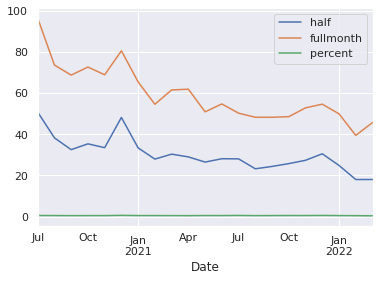

In [432]:
df_comp.head()
df_comp.plot()

In [433]:
#df_comp["Fullmonth"] = df_comp['Fullmonth'].str.replace('[A-Za-z]', '').str.replace(',', '.').astype(float)

In [434]:
size = int(len(df_comp)*0.8)
df_train, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [435]:
df_train

,half,fullmonth,percent,Unnamed: 4
Date,,,,
2020-07-01,50.813,96.47,0.53,NaN
2020-08-01,38.284,73.67,0.52,NaN
2020-09-01,32.551,68.78,0.47,NaN
2020-10-01,35.376,72.70,0.49,NaN
2020-11-01,33.509,68.93,0.49,NaN
2020-12-01,48.215,80.60,0.60,NaN
2021-01-01,33.403,65.45,0.51,NaN
2021-02-01,27.961,54.61,0.51,NaN
2021-03-01,30.364,61.56,0.49,NaN


In [436]:
df_test

,half,fullmonth,percent,Unnamed: 4
Date,,,,
2021-11-01,27.374,52.87,0.52,NaN
2021-12-01,30.539,54.65,0.56,NaN
2022-01-01,24.872,49.95,0.50,
2022-02-01,18.035,39.47,0.46,NaN
2022-03-01,18.035,45.73,0.39,NaN


# **simple AR model**

In [437]:
model_ar = ARIMA(df_train.fullmonth , order = (1,0,0))
results_ar = model_ar.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [438]:
start_date = df_test.index[0]
end_date=df_test.index[-1]
print(start_date , end_date)

2021-11-01 00:00:00 2022-03-01 00:00:00


In [439]:
df_pred_AR= results_ar.predict(start=start_date, end = end_date)

In [440]:
df_comp["AR-predictions"] = df_pred_AR
df_predictions["AR-predictions"] = df_pred_AR
print(df_pred_AR)

2021-11-01    51.317914
2021-12-01    53.646142
2022-01-01    55.625988
2022-02-01    57.309580
2022-03-01    58.741250
Freq: MS, Name: predicted_mean, dtype: float64


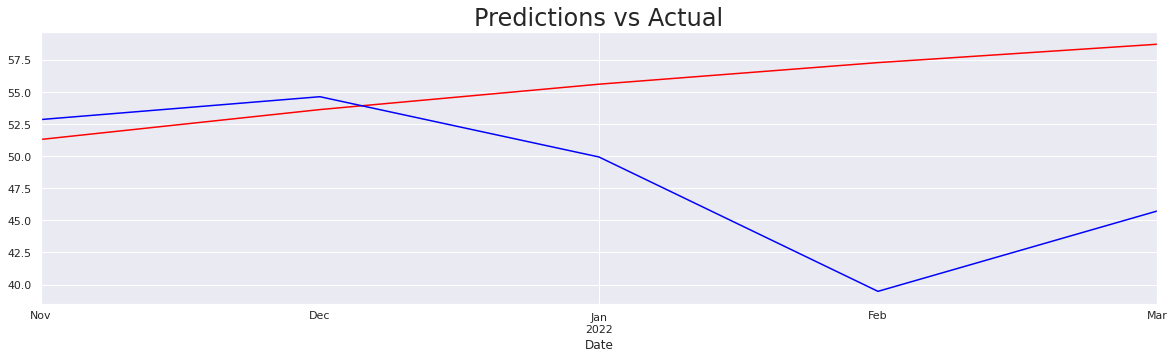

In [441]:
df_pred_AR[start_date:end_date].plot(figsize = (20,5), color = "red")
try:
     df_test.fullmonth[start_date:end_date].plot(color = "blue")
except ValueError:  
    pass
plt.title("Predictions vs Actual", size = 24)
plt.show()

In [442]:
model_ar2 = ARIMA(df_train.fullmonth , order = (2,0,0))
results_ar2 = model_ar.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [443]:
df_pred_AR2= results_ar.predict(start=start_date, end = end_date)

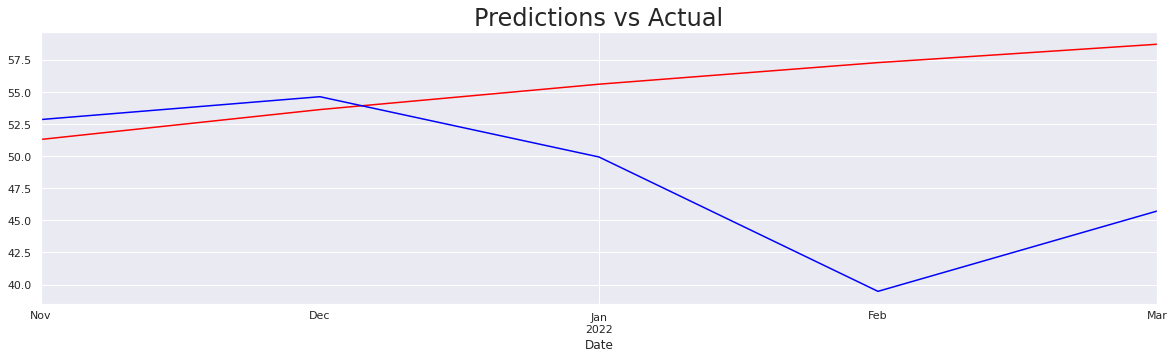

In [444]:
df_pred_AR2[start_date:end_date].plot(figsize = (20,5), color = "red")
try:
     df_test.fullmonth[start_date:end_date].plot(color = "blue")
except ValueError:  
    pass
plt.title("Predictions vs Actual", size = 24)
plt.show()

In [445]:
model_ar3 = ARIMA(df_train.fullmonth , order = (3,0,0))
results_ar3 = model_ar.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [446]:
df_pred_AR3= results_ar.predict(start=start_date, end = end_date)

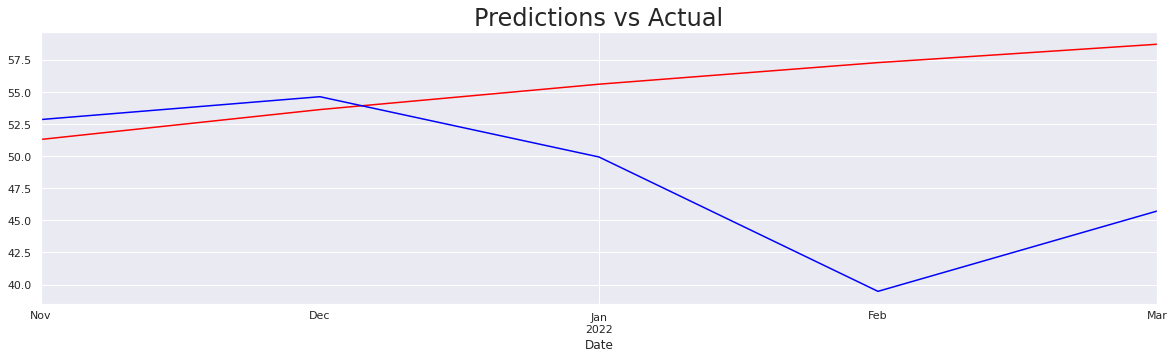

In [447]:
df_pred_AR3[start_date:end_date].plot(figsize = (20,5), color = "red")
try:
     df_test.fullmonth[start_date:end_date].plot(color = "blue")
except ValueError:  
    pass
plt.title("Predictions vs Actual", size = 24)
plt.show()

# **MA MODEL**

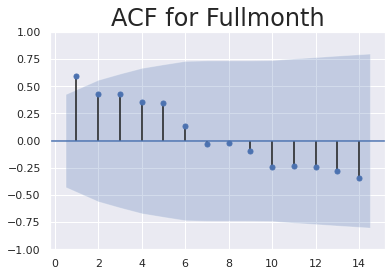

In [448]:
sgt.plot_acf(df_comp.fullmonth , zero = False)
plt.title("ACF for Fullmonth", size=24)
plt.show()

In [449]:
model_volume_1 = ARIMA(df_train.fullmonth, order=(0,0,1))
results_volume_1 = model_volume_1.fit()
print(results_volume_1.summary())


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              fullmonth   No. Observations:                   16
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 -60.019
Date:                Mon, 30 May 2022   AIC                            126.038
Time:                        08:17:59   BIC                            128.356
Sample:                    07-01-2020   HQIC                           126.157
                         - 10-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.6535      6.753      9.426      0.000      50.418      76.889
ma.L1          0.7925      0.357      2.223      0.026       0.094       1.491
sigma2        99.7556     41.642      2.396      0.0

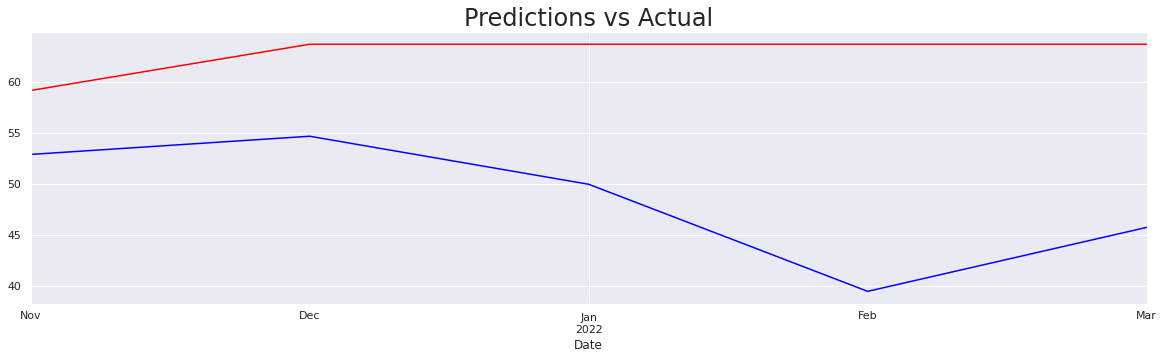

In [450]:
df_pred_MA1= results_volume_1.predict(start = start_date, end = end_date)

df_pred_MA1[start_date:end_date].plot(figsize = (20,5), color = "red")
try:
     df_test.fullmonth[start_date:end_date].plot(color = "blue")
except ValueError:  
    pass
plt.title("Predictions vs Actual", size = 24)
plt.show()
df_comp["MA1-predictions"] = df_pred_MA1
df_predictions["MA1_Predictions"] =df_comp["MA1-predictions"]

In [451]:
model_volume_2 = ARIMA(df_train.fullmonth, order=(0,0,2))
results_volume_2 = model_volume_2.fit()
print(results_volume_2.summary())


                               SARIMAX Results                                
Dep. Variable:              fullmonth   No. Observations:                   16
Model:                 ARIMA(0, 0, 2)   Log Likelihood                 -59.644
Date:                Mon, 30 May 2022   AIC                            127.288
Time:                        08:18:00   BIC                            130.378
Sample:                    07-01-2020   HQIC                           127.446
                         - 10-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.0930      7.930      8.082      0.000      48.550      79.636
ma.L1          0.9482      0.421      2.254      0.024       0.124       1.773
ma.L2          0.2264      0.282      0.802      0.4

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


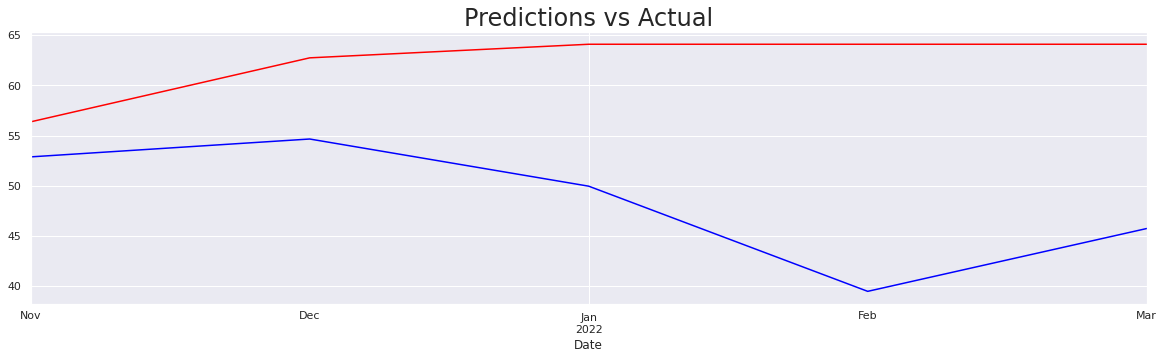

In [452]:
df_pred_MA2= results_volume_2.predict(start = start_date, end = end_date)

df_pred_MA2[start_date:end_date].plot(figsize = (20,5), color = "red")
try:
     df_test.fullmonth[start_date:end_date].plot(color = "blue")
except ValueError:  
    pass
plt.title("Predictions vs Actual", size = 24)
plt.show()
df_comp["MA2-predictions"] = df_pred_MA1
df_predictions["MA2_Predictions"] =df_comp["MA2-predictions"]

In [453]:
model_volume_3 = ARIMA(df_train.fullmonth, order=(0,0,3))
results_volume_3 = model_volume_3.fit()
print(results_volume_3.summary())


                               SARIMAX Results                                
Dep. Variable:              fullmonth   No. Observations:                   16
Model:                 ARIMA(0, 0, 3)   Log Likelihood                 -58.597
Date:                Mon, 30 May 2022   AIC                            127.195
Time:                        08:18:00   BIC                            131.058
Sample:                    07-01-2020   HQIC                           127.392
                         - 10-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.0223      8.968      7.251      0.000      47.446      82.598
ma.L1          0.9700      0.595      1.629      0.103      -0.197       2.137
ma.L2          0.6456      0.494      1.308      0.1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


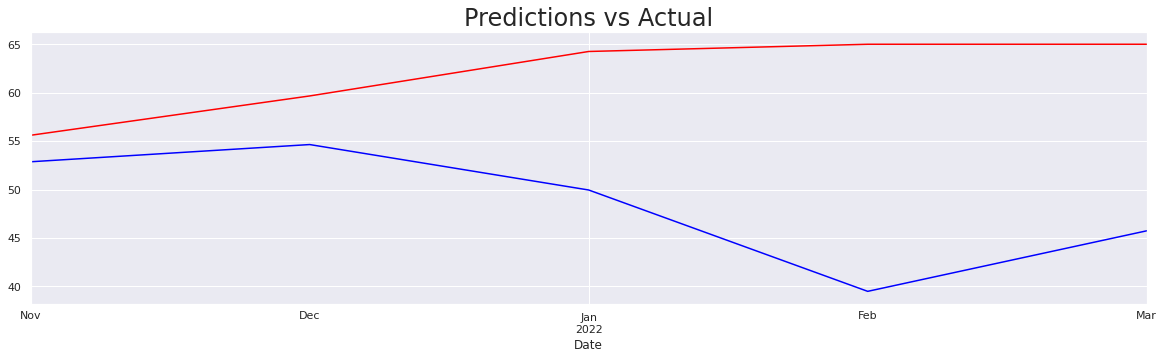

In [454]:
df_pred_MA3= results_volume_3.predict(start = start_date, end = end_date)

df_pred_MA3[start_date:end_date].plot(figsize = (20,5), color = "red")
try:
     df_test.fullmonth[start_date:end_date].plot(color = "blue")
except ValueError:  
    pass
plt.title("Predictions vs Actual", size = 24)
plt.show()
df_comp["MA3-predictions"] = df_pred_MA3
df_predictions["MA3_Predictions"] =df_comp["MA3-predictions"]

# **ARMA**

In [455]:
model_arima_101 = ARIMA(df_comp.fullmonth, order=(1,0,1))
results_arima_101 = model_arima_101.fit()
print(results_arima_101.summary())

                               SARIMAX Results                                
Dep. Variable:              fullmonth   No. Observations:                   21
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -75.182
Date:                Mon, 30 May 2022   AIC                            158.363
Time:                        08:18:00   BIC                            162.541
Sample:                    07-01-2020   HQIC                           159.270
                         - 03-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.2714     18.369      3.499      0.000      28.269     100.274
ar.L1          0.9343      0.122      7.644      0.000       0.695       1.174
ma.L1         -0.2335      0.300     -0.777      0.4

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


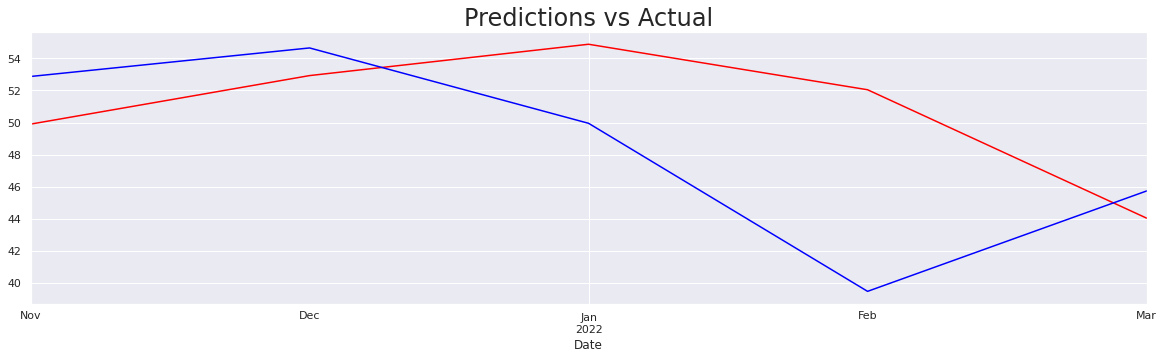

In [456]:
df_pred_ARMA= results_arima_101.predict(start = start_date, end = end_date)

df_pred_ARMA[start_date:end_date].plot(figsize = (20,5), color = "red")
try:
    df_test.fullmonth[start_date:end_date].plot(color = "blue")
except ValueError:  
    pass
plt.title("Predictions vs Actual", size = 24)
plt.show()
df_comp["ARMA_predictions"] = df_pred_ARMA
df_predictions["ARMA_Predictions"] =df_comp["ARMA_predictions"]

# **ARIMA**

In [457]:
model_arima_111 = ARIMA(df_comp.fullmonth, order=(1,1,1))
results_arima_111 = model_arima_111.fit()
print(results_arima_111.summary())

                               SARIMAX Results                                
Dep. Variable:              fullmonth   No. Observations:                   21
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -70.921
Date:                Mon, 30 May 2022   AIC                            147.841
Time:                        08:18:01   BIC                            150.828
Sample:                    07-01-2020   HQIC                           148.424
                         - 03-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2226      1.147      0.194      0.846      -2.026       2.471
ma.L1         -0.4566      1.221     -0.374      0.708      -2.849       1.936
sigma2        70.1568     20.063      3.497      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


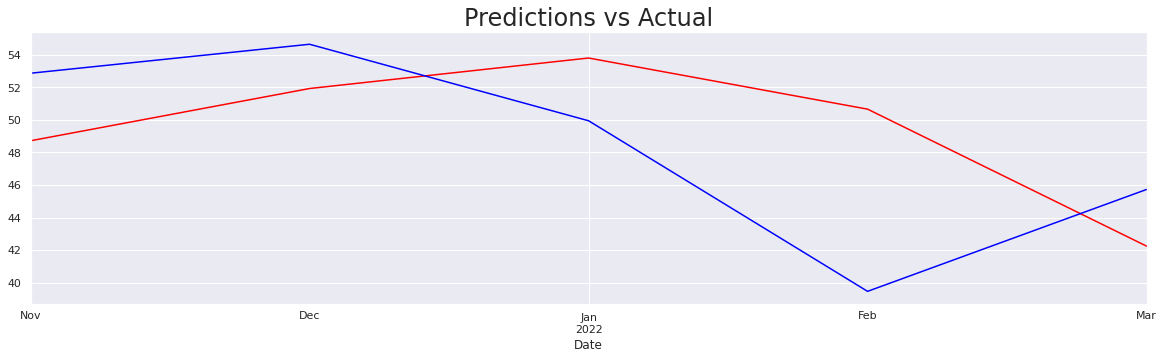

In [458]:
df_pred_ARIMA = results_arima_111.predict(start = start_date, end = end_date)

df_pred_ARIMA[start_date:end_date].plot(figsize = (20,5), color = "red")
try:
    df_test.fullmonth[start_date:end_date].plot(color = "blue")
except ValueError:  
    pass
plt.title("Predictions vs Actual", size = 24)
plt.show()
df_comp["ARIMA_predictions"] = df_pred_ARMA
df_predictions["ARIMA_Predictions"] =df_comp["ARIMA_predictions"]

# **Auto ARIMA**

In [459]:
from pmdarima.arima import auto_arima 

In [460]:
model_auto = auto_arima(df_comp.fullmonth[1:])

In [461]:
df_auto_pred = pd.DataFrame(model_auto.predict(n_periods = len(df_test[start_date:end_date])), index = df_test[start_date:end_date].index)

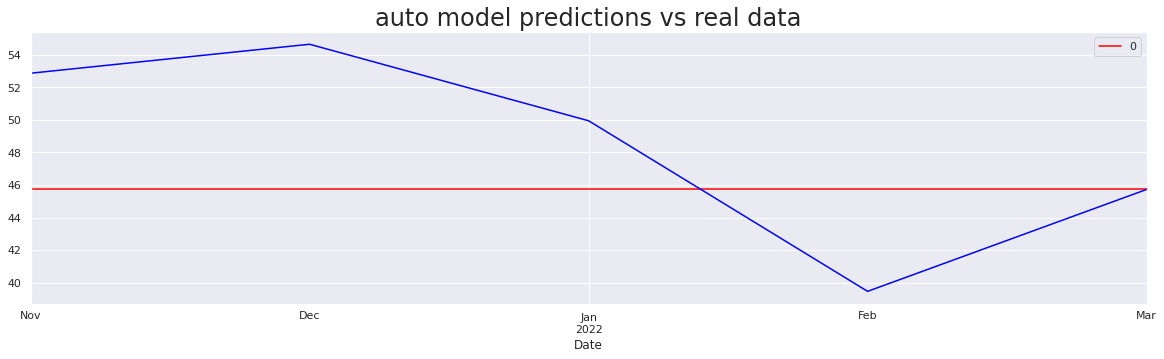

In [462]:
df_auto_pred.plot(figsize=(20,5), color="red")
df_test.fullmonth[start_date:end_date].plot(color = "blue")
plt.title("auto model predictions vs real data" , size = 24)
plt.show()

In [463]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   20
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -64.004
Date:                Mon, 30 May 2022   AIC                            130.008
Time:                        08:18:02   BIC                            130.952
Sample:                             0   HQIC                           130.168
                                 - 20                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        49.3749     18.186      2.715      0.007      13.731      85.019
===================================================================================
Ljung-Box (L1) (Q):                   2.14   Jarque-Bera (JB):                 0.47
Prob(Q):                              0.14   Prob(JB):                         0.79
Heteroskedasticity (H):               0.36   Skew:                            -0.20
Prob(H) (two-sided):                  0.24   Kurtosis:                         2.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [464]:
df_comp["AutoARIMA_predictions"] = df_auto_pred
df_predictions["AutoARIMA_Predictions"] =df_comp["AutoARIMA_predictions"]

# Saving results

In [465]:
df_predictions.to_csv('Volume_Predictions.csv')